<a href="https://colab.research.google.com/github/a60ese/22.01.85.0011/blob/main/sentimen_NewSakpole_deep_learning_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="border:2px solid #030833; border-radius:15px;  background:#ffffff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:12px; background:#410F01; text-align:center;">
        <span style="font-family:sans-serif; font-size:50px; color:#fff;">Spam SMS detection 🔎</span>
    </div>
</div>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#410F01;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Introduction... 📜</span>
    </div>
</div>

<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#410F01;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Install required libraries... 📥 </span>
    </div>
</div>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re, string, unicodedata
from string import punctuation
from termcolor import colored
from collections import Counter

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import keras
import tensorflow as tf
keras.utils.data_utils.pad_sequences
from keras.preprocessing import text, sequence
from keras import Sequential
from tensorflow import keras
import os
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import text
tokenizer = text.Tokenizer(...) 
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import set_config
set_config(print_changed_only = False)

#to see full text:
pd.set_option("display.max_colwidth", -1)

print(colored("\nNECESSARY LIBRARIES WERE SUCCESFULLY IMPORTED...", color = "green", attrs = ["bold", "dark"]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...



NECESSARY LIBRARIES WERE SUCCESFULLY IMPORTED...


<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#410F01;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Load dataset... 📍 </span>
    </div>
</div>

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/22.01.85.0011/DL/data_review_newsakpole.csv", encoding = "ISO-8859-1", engine = "python")

print(colored("\nDATASETS WERE SUCCESFULLY LOADED...",  color = "green", attrs = ["bold", "dark"]))


DATASETS WERE SUCCESFULLY LOADED...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:10px;">Look at the dataset</span>

In [ ]:
data.head()

,ï»¿sentim,komentar
0,positif,Mudah digunakan utk pembayaran pajak kendaraan
1,negatif,Masih ada bug. Di kolom no polisi terutama 2 huruf di belakanh
2,positif,Jos
3,positif,sangat membantu dalam pembayaran PKB
4,positif,Yg perlu diperbaiki- mekanisme pajak on line nya dibuat video tutorial nya sehingga lbh mudah dipahami. Maturnuwun


In [ ]:
data.columns

Index(['ï»¿sentim', 'komentar'], dtype='object')

In [ ]:
def remove_special_characters(word):
    result=word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

In [ ]:
data.head()

,ï»¿sentim,komentar
0,positif,Mudah digunakan utk pembayaran pajak kendaraan
1,negatif,Masih ada bug. Di kolom no polisi terutama 2 huruf di belakanh
2,positif,Jos
3,positif,sangat membantu dalam pembayaran PKB
4,positif,Yg perlu diperbaiki- mekanisme pajak on line nya dibuat video tutorial nya sehingga lbh mudah dipahami. Maturnuwun


In [ ]:
#rename dataset columns
data.rename(columns = {"ï»¿sentim": "target", "komentar": "text"}, inplace = True)

#drop unnecessary columns
#data.drop(["id"], axis = 1, inplace = True)

print(colored("\nOPERATIONS ON DATASETS WERE SUCCESFULLY COMPLETED...",  color = "green", attrs = ["bold", "dark"]))


OPERATIONS ON DATASETS WERE SUCCESFULLY COMPLETED...


<b><mark>Here we have removed some variables that we don't need to include in the machine learning model. In addition, we changed the names of the columns of the dataset that we will use. However, it is not mandatory to rename the columns</mark></b>

<div style="border:2px solid #030833; border-radius:10px; background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#410F01;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Get basic information about dataset... 🤔 </span>
    </div>
</div>

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Look at the dataset</span>

In [ ]:
data.head()

,target,text
0,positif,Mudah digunakan utk pembayaran pajak kendaraan
1,negatif,Masih ada bug. Di kolom no polisi terutama 2 huruf di belakanh
2,positif,Jos
3,positif,sangat membantu dalam pembayaran PKB
4,positif,Yg perlu diperbaiki- mekanisme pajak on line nya dibuat video tutorial nya sehingga lbh mudah dipahami. Maturnuwun


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Initial basic information about dataset</span>

In [ ]:
data.info(memory_usage = True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  500 non-null    object
 1   text    500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Check whether there are duplicated values in dataset</span>

In [ ]:
print(colored("There are {} duplicated values in the dataset".format(data.duplicated().sum()), color = "green", attrs = ["bold", "dark"]))

There are 56 duplicated values in the dataset




#### <span style="color:#CF350C">REFERENCE:</span> https://www.kaggle.com/code/rtatman/data-cleaning-challenge-deduplication

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Drop duplicated values from the dataset</span>

In [ ]:
data.drop_duplicates(inplace = True)

print(colored("\nDUPLICATED VALUES WERE SUCCESFULLY DROPPED...", color = "green", attrs = ["bold", "dark"]))


DUPLICATED VALUES WERE SUCCESFULLY DROPPED...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Look class frequencies of 'target' variable</span>

In [ ]:
grouped_target = data.groupby("target").count()
grouped_target["text"]

target
negatif    281
positif    163
Name: text, dtype: int64

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Check whether there are 'nan' values</span>

In [ ]:
data.isnull().sum()

target    0
text      0
dtype: int64

<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#410F01;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Data visualisation and exploratory data analysis... 📊 </span>
    </div>
</div>

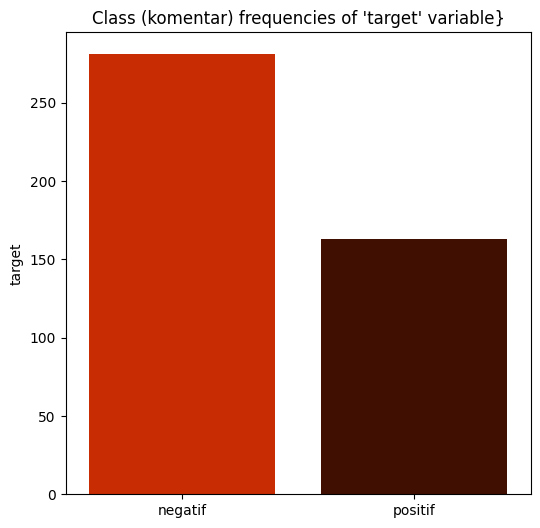

In [ ]:
plt.figure(figsize = [6, 6], clear = True, facecolor = "white")

sns.barplot(x = data["target"].value_counts().index,
            y = data["target"].value_counts(), palette = ["#C82C02", "#410F01"],
            saturation = 1).set(title = "Class (komentar) frequencies of 'target' variable}");

In [ ]:
fig = px.pie(data_frame = data, names = "target", hole = 0.4, title = "counts in 'target' variable", 
             width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Sunset_r)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.5, color = "#410F01")))

fig.update_layout(title_x = 0.5, title_font = dict(size = 30), uniformtext_minsize = 25)

fig.show()

## <span style='background:yellow;color:#000000;'>New features</span>

* #### <span style='background:blue;color:#ffffff;'>ch_no: number of characters in the texts</span>
* #### <span style='background:red;color:#ffffff;'>wd_no: number of words in the texts</span>
* #### <span style='background:green;color:#ffffff;'>sn_no: number of sentences in the texts</span>

In [ ]:
data["ch_no"] = data["text"].apply(len)
data["wd_no"] = data.apply(lambda row: nltk.word_tokenize(row["text"]), axis=1).apply(len)
data["sn_no"] = data.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1).apply(len)

data.describe().T.style.background_gradient(cmap = "Purples_r")

,count,mean,std,min,25%,50%,75%,max
ch_no,444.000000,100.641892,114.450814,2.000000,30.000000,66.000000,144.250000,1480.000000
wd_no,444.000000,17.162162,19.689367,1.000000,5.000000,11.000000,24.250000,260.000000
sn_no,444.000000,1.583333,1.278328,1.000000,1.000000,1.000000,2.000000,10.000000


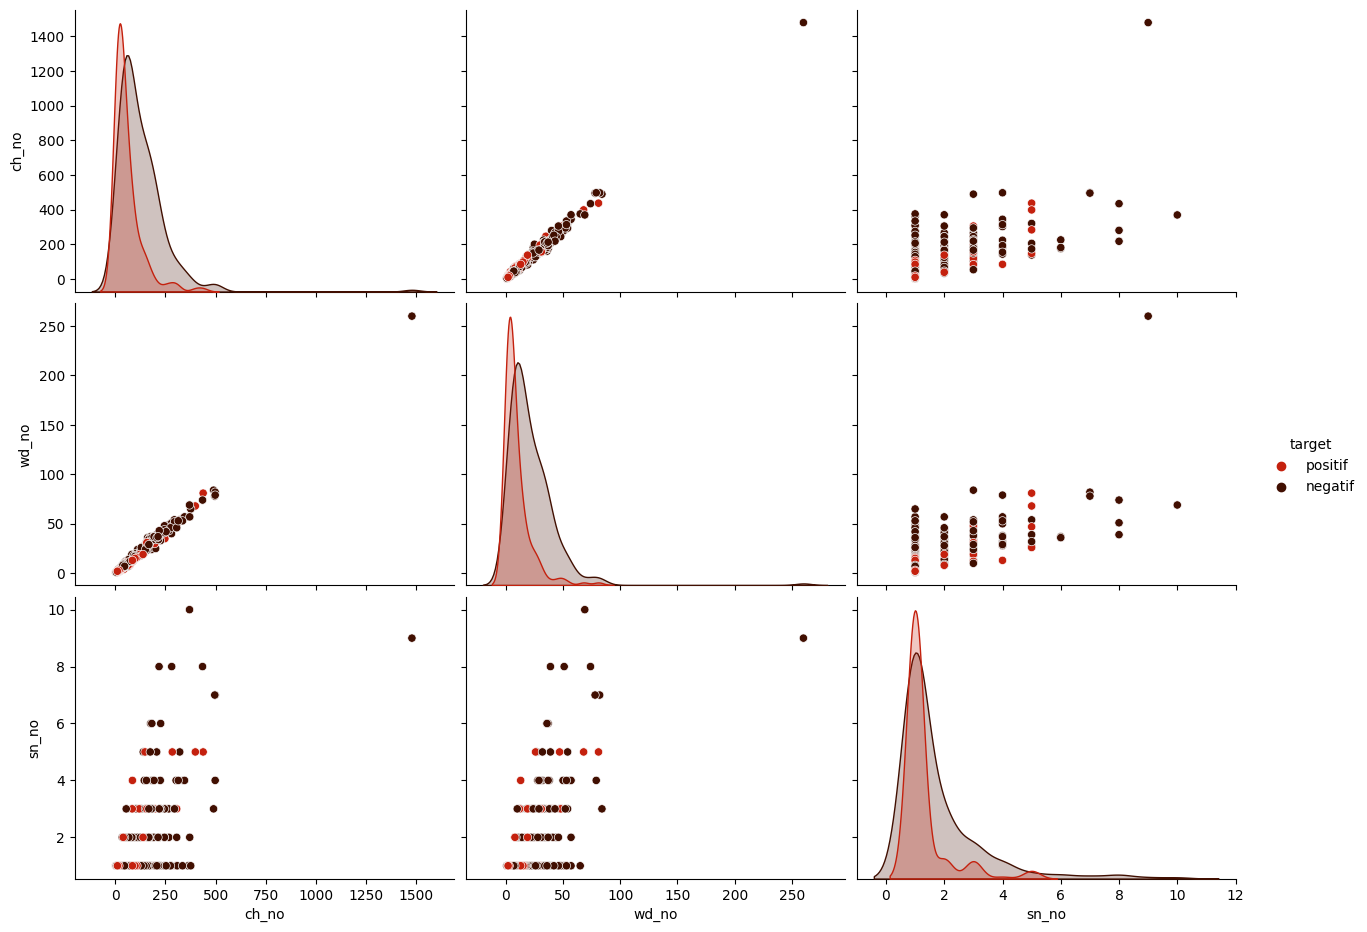

In [ ]:
fig = sns.pairplot(data = data, hue = "target", palette = ["#C4210E", "#410F01"], height = 3.15, aspect = 1.35)
plt.show(fig);

<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#410F01;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Data cleaning... 🧹</span>
    </div>
</div>

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Convert uppercase letters to lowercase letters</span>

In [ ]:
data["text"] = data["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

print(colored("\nUPPERCASE LETTERS WERE SUCCESFULLY CONVERTED INTO LOWERCASE LETTERS...", color = "green", attrs = ["bold", "dark"]))


UPPERCASE LETTERS WERE SUCCESFULLY CONVERTED INTO LOWERCASE LETTERS...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Delete punctuation marks</span>

In [ ]:
data["text"] = data["text"].str.replace('[^\w\s]','')

print(colored("\nPUNCTUATION MARKS WERE SUCCESFULLY DELETED...", color = "green", attrs = ["bold", "dark"]))


PUNCTUATION MARKS WERE SUCCESFULLY DELETED...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Delete numbers from texts
</span>

In [ ]:
data["text"] = data["text"].str.replace('\d','')

print(colored("\nNUMBERS WERE SUCCESFULLY DELETED...", color = "green", attrs = ["bold", "dark"]))


NUMBERS WERE SUCCESFULLY DELETED...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Delete stopwords and punctuation</span>

In [ ]:
stop_words = set(stopwords.words("english"))
punctuation = list(string.punctuation)
stop_words.update(punctuation)

data["text"] = data["text"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

print(colored("\nSTOPWORDS AND PUNCTUATION WERE SUCCESFULLY DELETED ...", color = "green", attrs = ["bold", "dark"]))


STOPWORDS AND PUNCTUATION WERE SUCCESFULLY DELETED ...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Lemmatization. That is, we get the roots of the words</span>

In [ ]:
data["text"] = data["text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

print(colored("\nTEXTS WERE SUCCESFULLY LEMMATIZED...", color = "green", attrs = ["bold", "dark"]))


TEXTS WERE SUCCESFULLY LEMMATIZED...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Remove URLs from texts if there is any</span>

In [ ]:
data["text"] = data["text"].apply(lambda x: " ".join(re.sub(r'http\S+', '', x) for x in x.split()))

print(colored("\nURLs WERE SUCCESFULLY REMOVED...", color = "green", attrs = ["bold", "dark"]))


URLs WERE SUCCESFULLY REMOVED...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Remove words less than 3 letters long</span>

In [ ]:
data["text"] = data["text"].apply(lambda x: ' '.join([x for x in x.split() if len(x) > 3]))

print(colored("\nWORDS LESS THAN 3 LETTERS LONG WERE SUCCESFULLY REMOVED...", color = "green", attrs = ["bold", "dark"]))


WORDS LESS THAN 3 LETTERS LONG WERE SUCCESFULLY REMOVED...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Look at the latest condition of the dataset</span>

In [ ]:
data.head(n = 10)

,target,text,ch_no,wd_no,sn_no
0,positif,mudah digunakan pembayaran pajak kendaraan,46,6,1
1,negatif,masih kolom polisi terutama huruf belakanh,62,13,2
2,positif,,3,1,1
3,positif,sangat membantu dalam pembayaran,36,5,1
4,positif,perlu diperbaiki mekanisme pajak line dibuat video tutorial sehingga mudah dipahami maturnuwun,114,18,2
5,negatif,open pake plat kaya dulu jangan pake digit rangka belakang disisi lain aplikasi banyak membantu pengecekan kesesuaian kendaraan bukan hanya untuk bayar pajak,187,33,2
6,positif,bagus,6,1,1
7,positif,aplikasi sangat membantu untuk pembayaran pajak sudah coba pembayaran online berhasil hanya masih muncul error database saat menggunakan menu status pengesahan menu unduh epengesahan,198,30,3
8,positif,sangat membantu,15,2,1
9,negatif,simpel sing ndisekra perlu ngetik kerangkapak,52,11,1


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Get every words from dataset and append them to 'corpus' list</span>

In [ ]:
corpus = []
for i in data.text:
    for j in i.split():
        corpus.append(j.strip())

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Count the words</span>

In [ ]:
counter = Counter(corpus)
common_words = counter.most_common(15)
dict(common_words)

{'bisa': 138,
 'pajak': 121,
 'aplikasi': 117,
 'bayar': 98,
 'tidak': 79,
 'ribet': 77,
 'sakpole': 72,
 'untuk': 67,
 'saya': 64,
 'lama': 62,
 'sangat': 61,
 'foto': 60,
 'malah': 55,
 'yang': 55,
 'kendaraan': 53}

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Visualisation with wordcloud</span>

<function matplotlib.pyplot.show(close=None, block=None)>

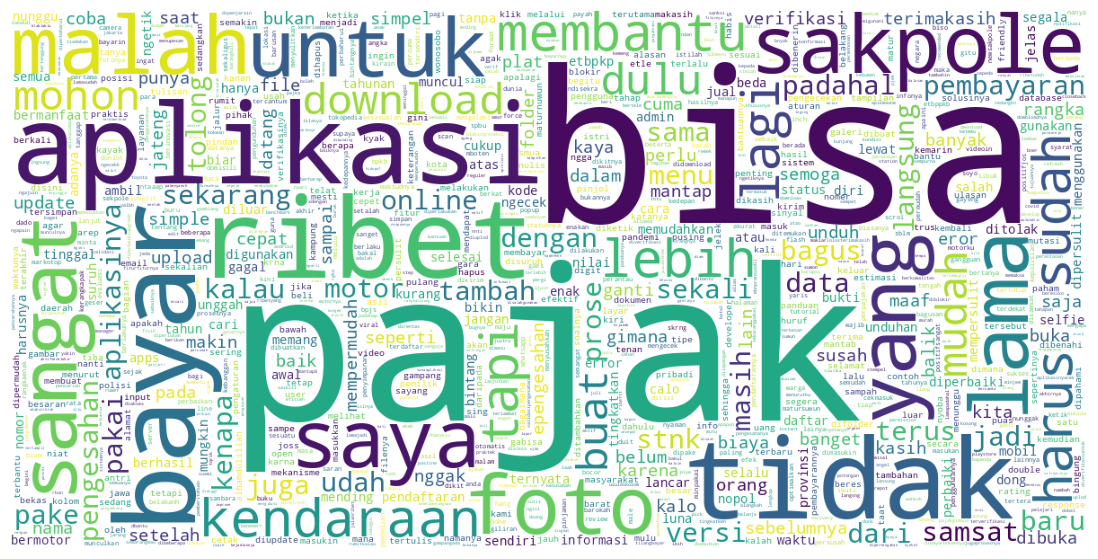

In [ ]:
text = " ".join(i for i in data.text)

wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "#410F01", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Distribution of average word length</span>

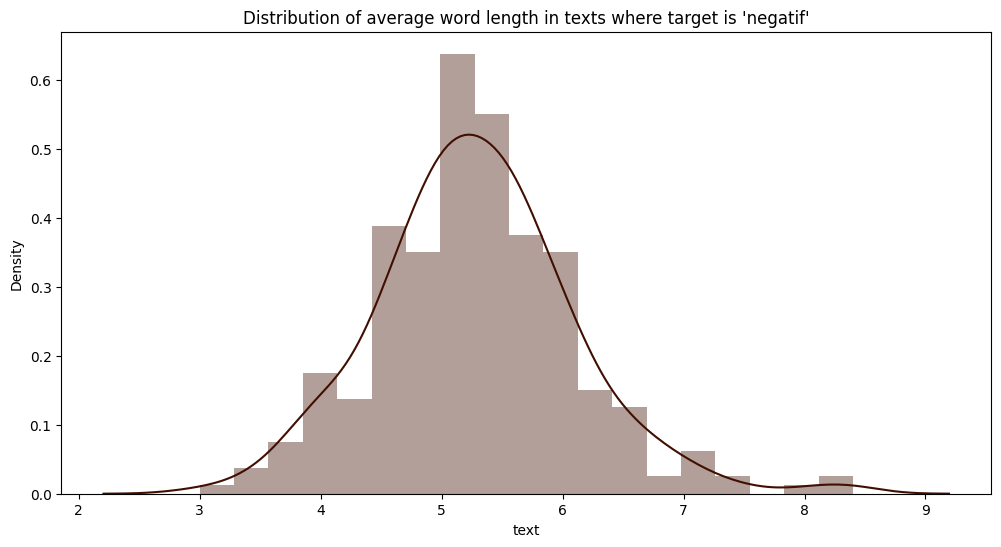

In [ ]:
fig,ax = plt.subplots(figsize = (12, 6))
text_words = data[data["target"] == "negatif"]["text"].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_words.map(lambda x: np.mean(x)), color = "#410F01", ax = ax).set_title("Distribution of average word length in texts where target is 'negatif'");

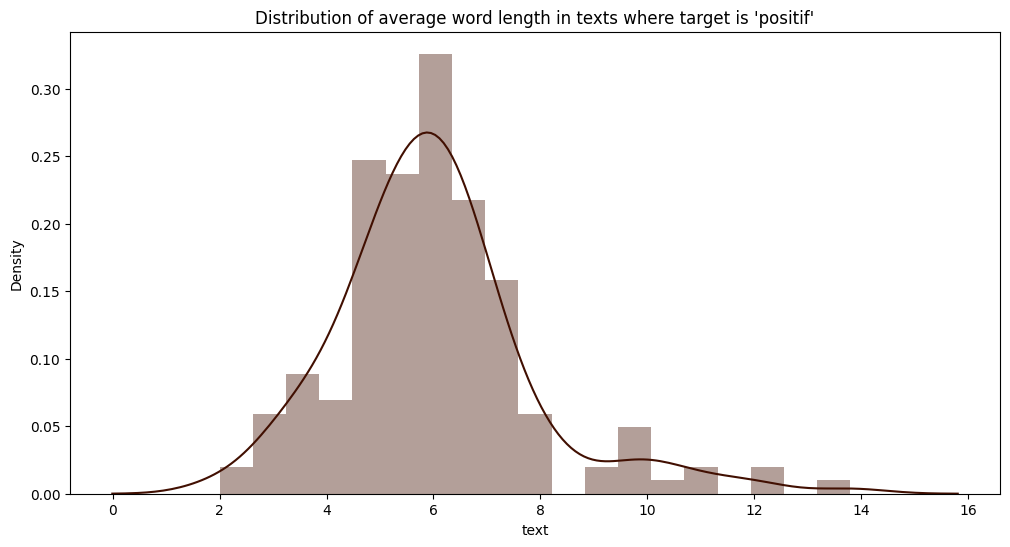

In [ ]:
fig,ax = plt.subplots(figsize = (12, 6))
text_words = data[data["target"] == "positif"]["text"].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_words.map(lambda x: np.mean(x)), color = "#410F01", ax = ax).set_title("Distribution of average word length in texts where target is 'positif'");

<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#410F01;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Prepare data for machine learning models... </span>
    </div>
</div>

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Encode target variable with LabelEncoder</span>

In [ ]:
lb = LabelEncoder()
data["target"] = lb.fit_transform(data["target"])

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Divide the dataset into test and train sets</span>

In [ ]:
x = data["text"]
y = data["target"]

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.20, shuffle = True, random_state = 11)

print(colored("\nDATASET WAS SUCCESFULLY DIVIDED ...", color = "green", attrs = ["bold", "dark"]))


DATASET WAS SUCCESFULLY DIVIDED ...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Shape of train_x and test_x</span>

In [ ]:
print("The shape of 'train_x' is {} and the shape of 'test_x' is {}".format(train_x.shape[0], test_x.shape[0]))

The shape of 'train_x' is 355 and the shape of 'test_x' is 89


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Tokenizing and padding</span>

In [ ]:
tokenizer = Tokenizer(num_words = None)
tokenizer.fit_on_texts(train_x)

tokenized_train = tokenizer.texts_to_sequences(train_x)
tokenized_test = tokenizer.texts_to_sequences(test_x)

train_x = pad_sequences(tokenized_train, maxlen = None)
test_x = pad_sequences(tokenized_test, maxlen = None)

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Global vector (glove) embedding</span>

### <span style='background:yellow;color:#000000;'>Global vector embedding</span>


<span style='background:green;color:#ffffff;'>GloVe is a word vector technique that rode the wave of word vectors after a brief silence. Just to refresh, word vectors put words to a nice vector space, where similar words cluster together and different words repel.</span> <span style='background:red;color:#ffffff;'>The advantage of GloVe is that, unlike Word2vec, GloVe does not rely just on local statistics (local context information of words), but incorporates global statistics (word co-occurrence) to obtain word vectors. But keep in mind that there’s quite a bit of synergy between the GloVe and Word2vec.</span>
    
    

#### <span style="color:#CF350C">REFERENCE:</span> https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010

In [ ]:
GLOVE_EMBEDDING = "/content/drive/MyDrive/22.01.85.0011/DL/glove.twitter.27B.200d.txt"

In [ ]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype = "float32")
embeddings_index = dict(get_coefs(*g.rstrip().rsplit(" ")) for g in open(GLOVE_EMBEDDING))

#_________________________________________________________________________________________#

#_________________________________________________________________________________________#

embeddings = np.stack(embeddings_index.values())
embedding_mean, embedding_std = embeddings.mean(), embeddings.std()
embedding_size = embeddings.shape[1]

word_index = tokenizer.word_index
nb_words = min(6012, len(word_index))+1

embedding_matrix = embedding_matrix = np.random.normal(embedding_mean, embedding_std, (nb_words, embedding_size))
for word, i in word_index.items():
    if i >= 6012:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Define callbacks</span>

### <span style='background:yellow;color:#000000;'>ReduceLROnPlateau</span>
<span style='background:green;color:#fff;'>Reduce learning rate when a metric has stopped improving.</span> <span style='background:red;color:#fff;'>Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.</span>


### <span style='background:yellow;color:#000000;'>Arguments:</span>

- <span style='background:green;color:#fff;'>monitor:</span> <span style='background:red;color:#fff;'>quantity to be monitored.</span>

- <span style='background:green;color:#fff;'>factor:</span> <span style='background:red;color:#fff;'>factor by which the learning rate will be reduced. new_lr = lr * factor.</span>

- <span style='background:green;color:#fff;'>patience:</span> <span style='background:red;color:#fff;'>number of epochs with no improvement after which learning rate will be reduced.</span>

- <span style='background:green;color:#fff;'>verbose:</span> <span style='background:red;color:#fff;'>int. 0: quiet, 1: update messages.</span>

- <span style='background:green;color:#fff;'>mode:</span> <span style='background:red;color:#fff;'>one of {'auto', 'min', 'max'}. In 'min' mode, the learning rate will be reduced when the quantity monitored has stopped decreasing; in 'max' mode it will be reduced when the quantity monitored has stopped increasing; in 'auto' mode, the direction is automatically inferred from the name of the monitored quantity.</span>

- <span style='background:green;color:#fff;'>min_delta:</span> <span style='background:red;color:#fff;'>threshold for measuring the new optimum, to only focus on significant changes.</span>

- <span style='background:green;color:#fff;'>cooldown:</span> <span style='background:red;color:#fff;'>number of epochs to wait before resuming normal operation after lr has been reduced.</span>

- <span style='background:green;color:#fff;'>>min_lr:</span> <span style='background:red;color:#fff;'>lower bound on the learning rate.</span>

![](https://miro.medium.com/max/1400/0*ge_Dyp7bNdlTuhjQ.png)

#### <span style="color:red">REFERENCE:</span> https://keras.io/api/callbacks/reduce_lr_on_plateau/

In [ ]:
lr_reduce = ReduceLROnPlateau(monitor = "val_accuracy", patience = 2, factor = 0.5, min_lr = 0.00001)

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Deep learning model</span>

### <span style='background:yellow;color:#000000;'>Sequential API</span>


<span style='background:green;color:#fff;'>The core idea of Sequential API is simply arranging the Keras layers in a sequential order and so, it is called Sequential API.</span> <span style='background:red;color:#fff;'>Most of the ANN also has layers in sequential order and the data flows from one layer to another layer in the given order until the data finally reaches the output layer.</span>

### <span style='background:yellow;color:#000000;'>Long Short-term Memory (LSTM)</span>

<span style='background:green;color:#fff;'>LSTM stands for long short-term memory networks, used in the field of Deep Learning. It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems. LSTM has feedback connections, i.e., it is capable of processing the entire sequence of data, apart from single data points such as images. This finds application in speech recognition, machine translation, etc. LSTM is a special kind of RNN, which shows outstanding performance on a large variety of problems.</span>

### <span style='background:yellow;color:#000000;'>The Logic Behind LSTM</span>

<span style='background:red;color:#fff;'>The central role of an LSTM model is held by a memory cell known as a ‘cell state’ that maintains its state over time. The cell state is the horizontal line that runs through the top of the below diagram. It can be visualized as a conveyor belt through which information just flows, unchanged. Information can be added to or removed from the cell state in LSTM and is regulated by gates. These gates optionally let the information flow in and out of the cell. It contains a pointwise multiplication operation and a sigmoid neural net layer that assist the mechanism.</span>

![image.png](attachment:b64e9351-f770-4ebd-8281-8833ef80b29b.png)

### <span style='background:yellow;color:#000000;'>What are Bidirectional LSTMs?</span>

<span style='background:blue;color:#fff;'>These are like an upgrade over LSTMs. In bidirectional LSTMs, each training sequence is presented forward and backward so as to separate recurrent nets. Both sequences are connected to the same output layer. Bidirectional LSTMs have complete information about every point in a given sequence, everything before and after it. But, how do you rely on the information that hasn’t happened yet? The human brain uses its senses to pick up information from words, sounds, or from whole sentences that might, at first, make no sense but mean something in a future context. Conventional recurrent neural networks are only capable of using the previous context to get information. Whereas, in bidirectional LSTMs, the information is obtained by processing the data in both directions within two hidden layers, pushed toward the same output layer. This helps bidirectional LSTMs access long-range context in both directions.</span>

![image.png](attachment:0e32c257-cd6e-4cbb-b4aa-3ae0e7b7f841.png)

#### <span style="color:red">REFERENCE:</span>https://intellipaat.com/blog/what-is-lstm/

In [ ]:
model = Sequential()

model.add(Embedding(6013, output_dim = 100, weights = [embedding_matrix], trainable = False))

model.add(LSTM(units = 128, return_sequences = True, recurrent_dropout = 0.3, dropout = 0.5))

model.add(LSTM(units = 64, recurrent_dropout = 0.3, dropout = 0.5))

model.add(Dense(units = 32, activation = "relu"))

model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.01), loss = "binary_crossentropy", metrics = ["accuracy"])

ValueError: ignored

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
history = model.fit(train_x,
                    train_y,
                    batch_size = 64,
                    validation_data = (test_x, test_y),
                    epochs = 20,
                    callbacks = [lr_reduce])

Epoch 1/20
65/65 [==============================] - 32s 423ms/step - loss: 0.1859 - accuracy: 0.9262 - val_loss: 0.1503 - val_accuracy: 0.9487 - lr: 0.0100
Epoch 2/20
65/65 [==============================] - 27s 410ms/step - loss: 0.1070 - accuracy: 0.9625 - val_loss: 0.1310 - val_accuracy: 0.9574 - lr: 0.0100
Epoch 3/20
65/65 [==============================] - 27s 412ms/step - loss: 0.0890 - accuracy: 0.9686 - val_loss: 0.1310 - val_accuracy: 0.9632 - lr: 0.0100
Epoch 4/20
65/65 [==============================] - 27s 412ms/step - loss: 0.0795 - accuracy: 0.9722 - val_loss: 0.1258 - val_accuracy: 0.9632 - lr: 0.0100
Epoch 5/20
65/65 [==============================] - 30s 460ms/step - loss: 0.0694 - accuracy: 0.9761 - val_loss: 0.1194 - val_accuracy: 0.9642 - lr: 0.0100
Epoch 6/20
65/65 [==============================] - 27s 408ms/step - loss: 0.0677 - accuracy: 0.9770 - val_loss: 0.1297 - val_accuracy: 0.9584 - lr: 0.0100
Epoch 7/20
65/65 [==============================] - 29s 443ms/st

In [ ]:
print("Model accuracy on the train set: ", model.evaluate(train_x, train_y)[1])
print("Model accuracy on the test set: ", model.evaluate(test_x, test_y)[1])

130/130 [==============================] - 6s 42ms/step - loss: 0.0058 - accuracy: 0.9981
Model accuracy on the train set:  0.9980652928352356
33/33 [==============================] - 1s 30ms/step - loss: 0.1767 - accuracy: 0.9681
Model accuracy on the test set:  0.9680851101875305


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Visualization of the model percent</span>

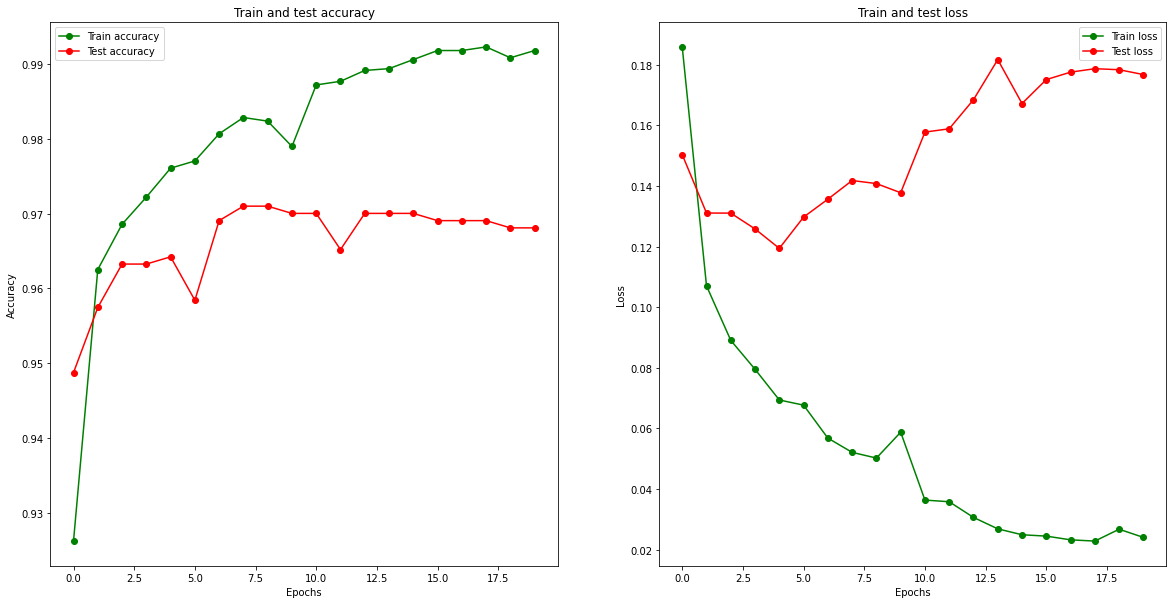

In [ ]:
epochs = [i for i in range(20)]

fig, ax = plt.subplots(1, 2)
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, "go-", label = "Train accuracy")
ax[0].plot(epochs, val_acc, "ro-", label = "Test accuracy")
ax[0].set_title("Train and test accuracy")
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, "go-", label = "Train loss")
ax[1].plot(epochs, val_loss, "ro-", label = "Test loss")
ax[1].set_title("Train and test loss")
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
prediction = model.predict(test_x)
classes_pred = np.argmax(prediction, axis = 1)

print(classification_report(test_y, classes_pred))

33/33 [==============================] - 1s 28ms/step
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       896
           1       0.00      0.00      0.00       138

    accuracy                           0.87      1034
   macro avg       0.43      0.50      0.46      1034
weighted avg       0.75      0.87      0.80      1034



[[896   0]
 [138   0]]


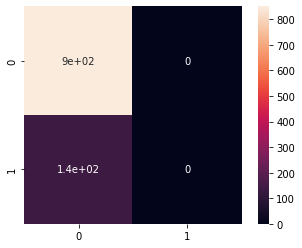

In [ ]:
conf_mat = confusion_matrix(test_y, classes_pred)
print(conf_mat)

sns.heatmap(conf_mat, square = True, annot = True, robust = True)
plt.show()

![thank-you-transparent-png-images-826944-removebg-preview.png](attachment:242dbd60-3c41-490a-b45a-7d8f99ef38c4.png)